In [1]:
import sys, os
import numpy as np
import pandas as pd
import json
import pickle

sys.path.append('../')
from tools.mongo_analysis_tools import *
from tools.plots import get_dendro_heatmap, get_expression_hist
from tools.get_predictive_power import gene_predictive_accuracy


#import plotly
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True) # run at the start of every ipython notebook

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [3]:
output = collect_run_output(23922, 31013, 'PAN_CANCER_classifier_K', verbose=1)

All these experiments belong to experiment: PAN_CANCER_classifier_K


In [4]:
runs_per_classifier(output)

,id,#runs
name,,
LinearSVC,"[23922, 23934, 23947, 23958, 23969, 23980, 239...",1521
RandomForestClassifier,"[23923, 23924, 23925, 23926, 23927, 23928, 239...",2457


In [5]:
predict_label = output[0]['config']['predict_label']
subset_query = output[0]['config']['subset_query'][0]
subset_label = output[0]['config']['subset_label']
data_latex(predict_label, subset_query, subset_label)

For the label project we have 1158 samples and 5 different labels. The classes and their support are as follows:\\
TARGET-RT: 5, TARGET-WT: 132, TCGA-KICH: 89, TCGA-KIRC: 611, TCGA-KIRP: 321


In [6]:
selected_genes_ids, similarities = compute_gene_importance(output, similarity=10, latex=True)
similarities

\textbf{Gene analysis:}\\
The models selected have the following number of genes:\\
LinearSVC: 2905\\
RandomForestClassifier: 6811\\
Intersection: 14\\


{'LinearSVC': [0.9477223178428,
  0.9527940332759613,
  0.9458462421113029,
  0.9447619047619052,
  0.948146873207115,
  0.9518932874354563,
  0.9769994262765347,
  0.9439873780837638,
  0.9735628227194495,
  0.9506368330464721],
 'RandomForestClassifier': [0.5750514101057835,
  0.6913129681304191,
  0.8140328976354791,
  0.8809810544867063,
  0.6825599608419084,
  0.8398825256975034,
  0.8971390112579526,
  0.8432134116495313,
  0.7928253315714697,
  0.834684089463123]}

In [7]:
latex_genes(selected_genes_ids)

These are the top 14 genes in order of importance:\\
APLNR$\text{\textbar}$187, APOL4$\text{\textbar}$80832, ARHGAP40$\text{\textbar}$343578, AQP6$\text{\textbar}$363, APOL5$\text{\textbar}$80831, AQP5$\text{\textbar}$362, A1CF$\text{\textbar}$29974, APOA1$\text{\textbar}$335, DEFB132$\text{\textbar}$400830, ARL4D$\text{\textbar}$379, ARC$\text{\textbar}$23237, C11orf97$\text{\textbar}$643037, ARHGEF38$\text{\textbar}$54848, ABCA12$\text{\textbar}$26154\\


In [8]:
print_latex_config(output)

\textbf{Framework configuration:}\\
Data subset:\\
Predict label: project\\
Split label: project\\
Train test split: 0.25\\
Classifiers: LinearSVC and RandomForestClassifier\\
Stop running: similarity $> 0.8$, for 10 consecutive runs\\
Number of genes selected per algorithm: 250\\


In [9]:
print_latex_prediction_metrics(output)

\textbf{Prediction metrics:}\\
Average accuracy: 0.9354 (0.0003)\\
Average Cohen kappa: 0.8971 (0.0007)\\
Average accuracy LSVM: 0.9464 (0.0002)\\
Average accuracy RandomForestClassifier: 0.9286 (0.0002)\\


Saved cm image T_classifier_K_cm.png

The Confusion matrix can be found in figure \ref{fig:cm-K}. The Classification Report can be found in table \ref{tab:cr-K}.

\begin{figure}[H]
\centering
\includegraphics[height=5cm]{T_classifier_K_cm.png}
\caption{Normalized Confusion Matrix over the test set}
\label{fig:cm-K}
\end{figure}


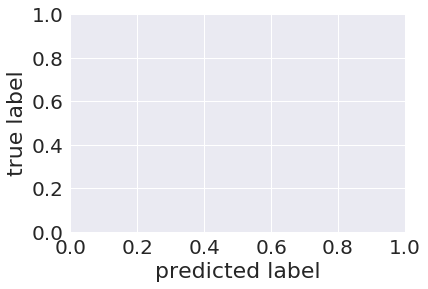

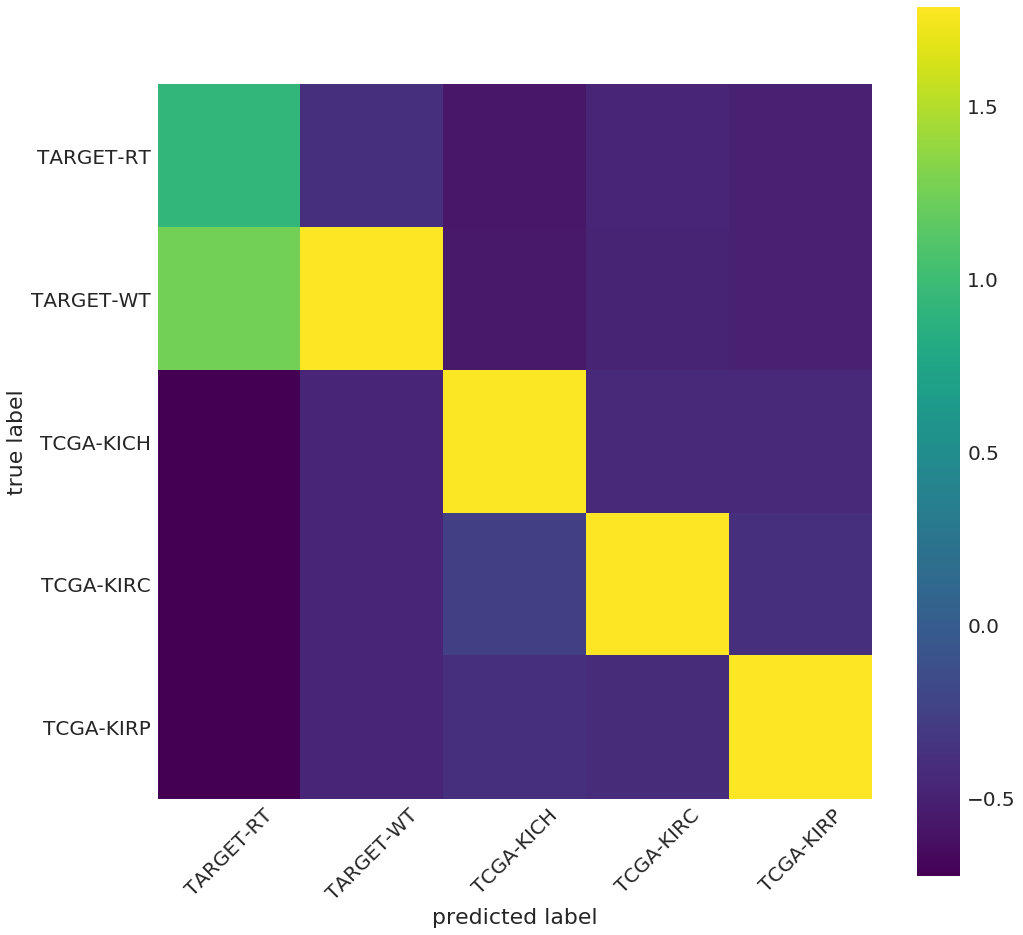

In [25]:
save_confusion_matrix(output, theNotebook)

In [11]:
print_latex_cr(output)

\textbf{Classification Report:}\\
\begin{tabular}{lrrrr}
\toprule
{} &    fscore &  precision &    recall &  support \\
\midrule
TARGET-RT &  0.142131 &   0.163608 &  0.143414 &      2.0 \\
TARGET-WT &  0.971403 &   0.962218 &  0.981558 &     33.0 \\
TCGA-KICH &  0.809743 &   0.822115 &  0.806195 &     23.0 \\
TCGA-KIRC &  0.956908 &   0.956730 &  0.957419 &    153.0 \\
TCGA-KIRP &  0.926390 &   0.922395 &  0.931314 &     81.0 \\
\bottomrule
\end{tabular}



In [12]:
gene_predictive_accuracy(output, selected_genes_ids, folds=10, latex=True)

Reading data
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
We have 14 selected genes as a result, doing the same prediction again but only with these genes we get the following accuracies averaged

{'LinearSVC': [0.8595890410958904,
  0.8595890410958904,
  0.8595890410958904,
  0.8595890410958904,
  0.8595890410958904,
  0.8595890410958904,
  0.8595890410958904,
  0.8595890410958904,
  0.8595890410958904,
  0.8595890410958904],
 'LinearSVC_avr': 0.8595890410958905,
 'RandomForestClassifier': [0.8664383561643836,
  0.8664383561643836,
  0.8664383561643836,
  0.8835616438356164,
  0.8664383561643836,
  0.8698630136986302,
  0.8595890410958904,
  0.8801369863013698,
  0.8767123287671232,
  0.8595890410958904],
 'RandomForestClassifier_avr': 0.8695205479452055}

In [13]:
latex_genes(selected_genes_ids[:50])

These are the top 14 genes in order of importance:\\
APLNR$\text{\textbar}$187, APOL4$\text{\textbar}$80832, ARHGAP40$\text{\textbar}$343578, AQP6$\text{\textbar}$363, APOL5$\text{\textbar}$80831, AQP5$\text{\textbar}$362, A1CF$\text{\textbar}$29974, APOA1$\text{\textbar}$335, DEFB132$\text{\textbar}$400830, ARL4D$\text{\textbar}$379, ARC$\text{\textbar}$23237, C11orf97$\text{\textbar}$643037, ARHGEF38$\text{\textbar}$54848, ABCA12$\text{\textbar}$26154\\


In [9]:
selected_genes_data, selected_genes_ids, sample_to_label = get_dendro_data(predict_label, selected_genes_ids, subset_query, subset_label)

heatmap, legend, color_scale = get_dendro_heatmap(selected_genes_data, selected_genes_ids, sample_to_label, color_option=1, nb_genes_used=50)
histogram = get_expression_hist(selected_genes_data, decimals=2, drop_zero=True, log=False, color_scale=color_scale)

In [10]:
#iplot(heatmap)

In [11]:
iplot(histogram)

In [12]:
latex_heatmap(heatmap, histogram, theNotebook)

Succeeded in saving T_classifier_K_hist.png
The dendro-heatmap can be found in figure \ref{fig:heat-K}. The top 50 most enriched pathways can be found in table \ref{tab:pw-K}.

\begin{figure}[H]
\centering
\includegraphics[height=5cm]{T_classifier_K_heat.png}
\caption{Dendro-heatmap for the top genes}
\label{fig:heat-K}
\end{figure}


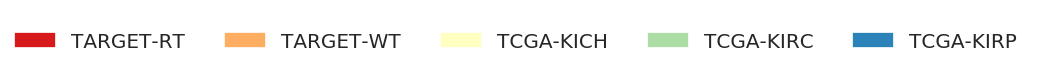

In [18]:
path = '../plots/figures/'
leg_name = '{}_legend.png'.format(theNotebook)
legend.savefig(os.path.join(path, leg_name)) 
legend

In [19]:
pw_latex(selected_genes_ids)

querying 1-14...done.
querying 0/73
querying 50/73
collected the 50 most enriched pathways
The top 50 most enriched pathways based on these genes are:\\
\begin{tabular}{llr}
\toprule
{} &                                               name &   p\_value \\
\midrule
0  &                    Passive transport by Aquaporins &  0.000034 \\
1  &              ABC transporters in lipid homeostasis &  0.000066 \\
2  &                       Aquaporin-mediated transport &  0.000499 \\
3  &         Transmembrane transport of small molecules &  0.000679 \\
4  &             ABC-family proteins mediated transport &  0.000798 \\
5  &                    Scavenging by Class B Receptors &  0.003405 \\
6  &                                   Rho GTPase cycle &  0.004207 \\
7  &                    mRNA Editing: C to U Conversion &  0.006122 \\
8  &                         Formation of the Editosome &  0.006122 \\
9  &                                       mRNA Editing &  0.007477 \\
10 &                     S